# <center>Music features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 15, 10
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import decomposition

#### Признаки
 - `filename` - название файла
 - `tempo` - The speed at which a passage of music is played (темп)
 - `beats` - Rythmic unit in music (ритм)
 - `chroma_stft` - Short Time Fourier Transform - Оконное преобразование Фурье. Служит для расчета спектра сигнала.
 - `rmse` - Root Mean Square Error
 - `spectral_centroid` - Indicates where the "center of mass" of the spectrum is located. 
 - `spectral_bandwidth` - It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value
 - `rolloff` - Roll-off is the steepness of a transmission function with frequency (крутизна передаточной функции)
 - `zero_crossing_rate` - The rate at which the signal changes from positive to negative or back
 - `mfcc1 -20` - Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. Мел-кепстральные коэффициенты 
 - `label` - Contains a string depicting the genre

In [2]:
train = pd.read_csv('data.csv')
train.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
filename              1000 non-null object
tempo                 1000 non-null float64
beats                 1000 non-null int64
chroma_stft           1000 non-null float64
rmse                  1000 non-null float64
spectral_centroid     1000 non-null float64
spectral_bandwidth    1000 non-null float64
rolloff               1000 non-null float64
zero_crossing_rate    1000 non-null float64
mfcc1                 1000 non-null float64
mfcc2                 1000 non-null float64
mfcc3                 1000 non-null float64
mfcc4                 1000 non-null float64
mfcc5                 1000 non-null float64
mfcc6                 1000 non-null float64
mfcc7                 1000 non-null float64
mfcc8                 1000 non-null float64
mfcc9                 1000 non-null float64
mfcc10                1000 non-null float64
mfcc11                1000 non-null float64
mfcc12           

In [4]:
train.isnull().any()

filename              False
tempo                 False
beats                 False
chroma_stft           False
rmse                  False
spectral_centroid     False
spectral_bandwidth    False
rolloff               False
zero_crossing_rate    False
mfcc1                 False
mfcc2                 False
mfcc3                 False
mfcc4                 False
mfcc5                 False
mfcc6                 False
mfcc7                 False
mfcc8                 False
mfcc9                 False
mfcc10                False
mfcc11                False
mfcc12                False
mfcc13                False
mfcc14                False
mfcc15                False
mfcc16                False
mfcc17                False
mfcc18                False
mfcc19                False
mfcc20                False
label                 False
dtype: bool

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
filename              1000 non-null object
tempo                 1000 non-null float64
beats                 1000 non-null int64
chroma_stft           1000 non-null float64
rmse                  1000 non-null float64
spectral_centroid     1000 non-null float64
spectral_bandwidth    1000 non-null float64
rolloff               1000 non-null float64
zero_crossing_rate    1000 non-null float64
mfcc1                 1000 non-null float64
mfcc2                 1000 non-null float64
mfcc3                 1000 non-null float64
mfcc4                 1000 non-null float64
mfcc5                 1000 non-null float64
mfcc6                 1000 non-null float64
mfcc7                 1000 non-null float64
mfcc8                 1000 non-null float64
mfcc9                 1000 non-null float64
mfcc10                1000 non-null float64
mfcc11                1000 non-null float64
mfcc12           

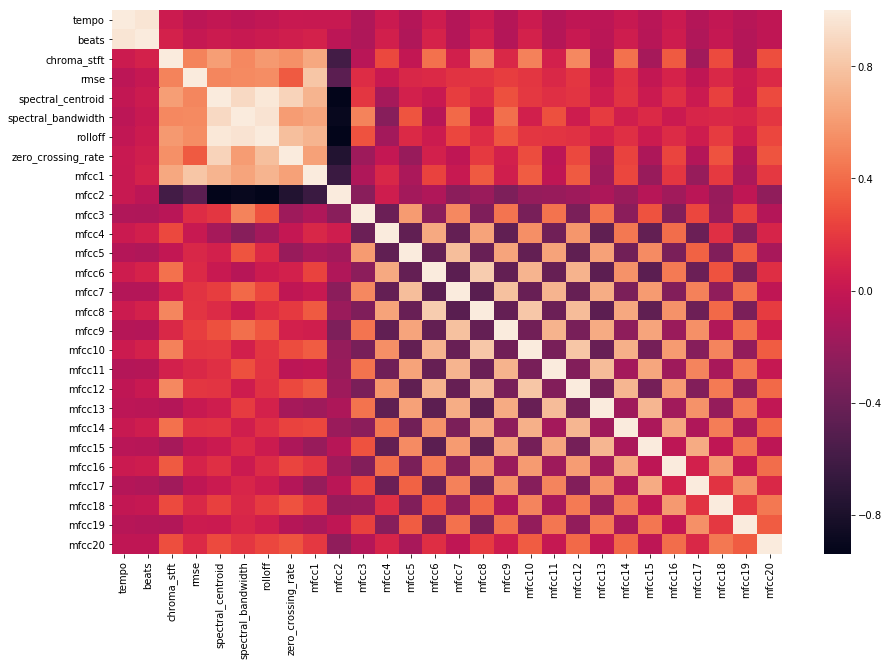

In [10]:
corr_matrix = train.drop(['filename'], axis=1).corr()
sns.heatmap(corr_matrix);

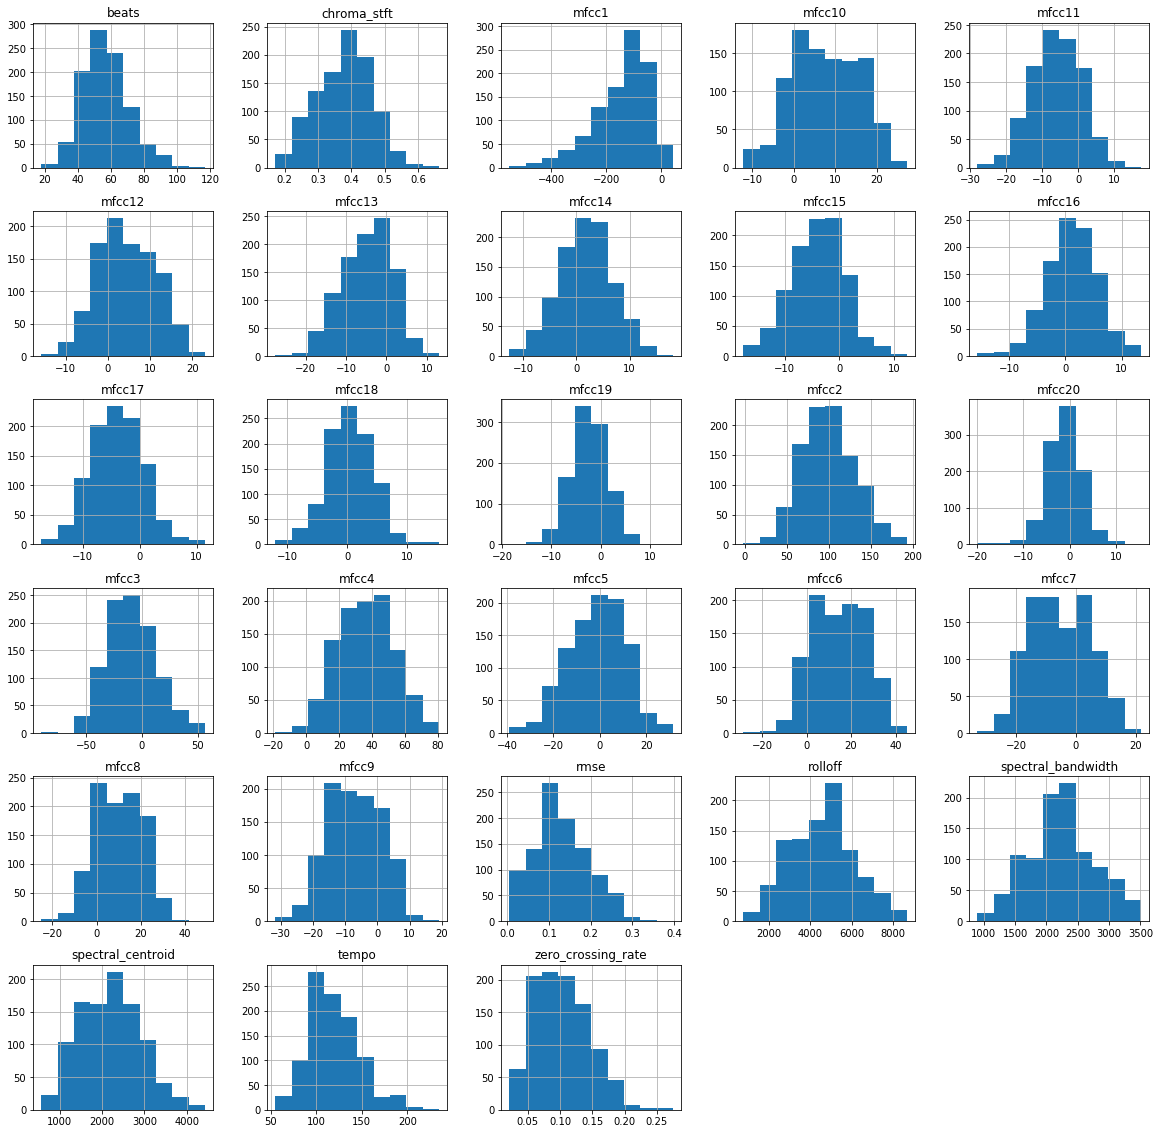

In [11]:
features = list(set(train.columns) - set(['filename']))
train[features].hist(figsize=(20, 20));

In [10]:
data = []
for label in train.label.unique():
    data.append(go.Box(y=train[train.label==label].tempo, name=label))
iplot(data, show_link = False)

In [12]:
data = []
for label in train.label.unique():
    data.append(go.Box(y=train[train.label==label].beats, name=label))
iplot(data, show_link = False)

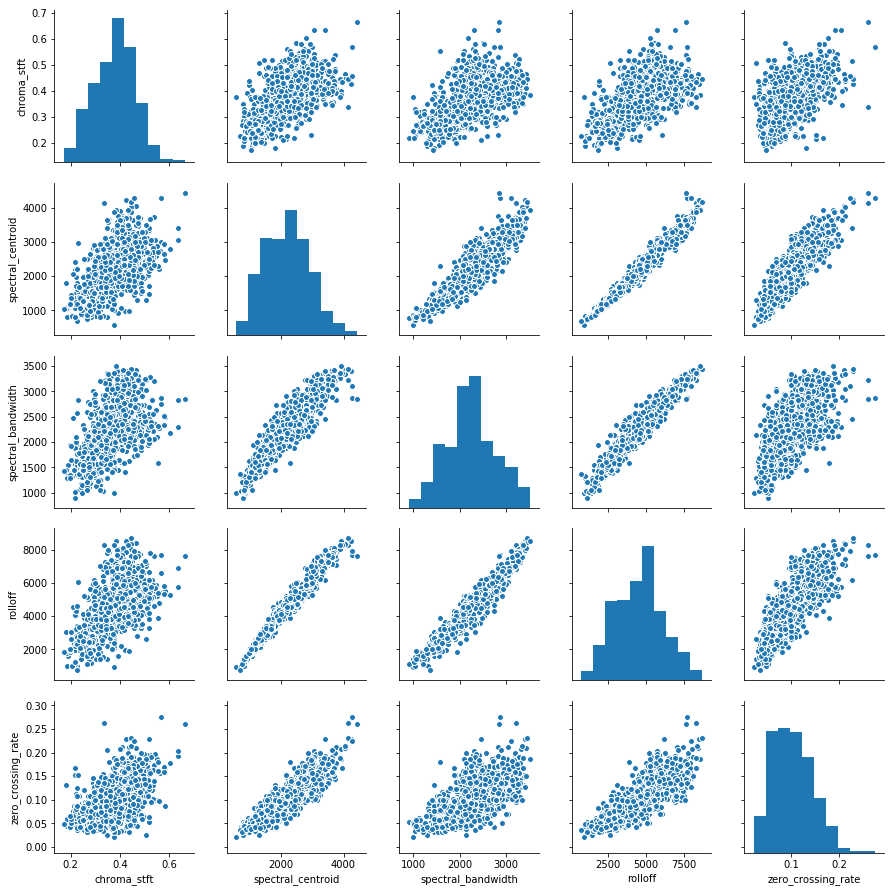

In [17]:
cols = ['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']
sns.pairplot(train[cols]);

In [3]:
def replace_cat_var(df, feature):
    features =  df[feature].unique()
    dct = {}
    count = 0
    for feat in features:
        count += 1
        dct.update({feat: count})
    df[feature] = df[feature].map(dct)    

In [4]:
replace_cat_var(train, 'label')
train.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,1
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,1
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,1
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,1
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,1


In [5]:
train = train.drop(['filename', 'mfcc2'], axis=1)

In [6]:
train.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,-46.809993,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,1
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,3.289490,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,1
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,18.620984,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,1
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,-15.438986,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,1
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,-12.517677,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,1


In [9]:
X = train.drop('label', 1)
y= train.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
model = KNeighborsClassifier(n_neighbors= 30)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_predict, y_test)

0.332

In [10]:
tree = DecisionTreeClassifier(random_state=0, max_depth = 10)
tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)
accuracy_score(y_predict, y_test)

0.486

In [11]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=42)
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_predict, y_test) 

0.252